In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from matplotlib.animation import FuncAnimation
from tqdm import tqdm 

In [3]:
#Constantes
omega_L = 2.6617*10**(-6) #v angular de la luna

G = 6.67*10**(-11) #cte gravitación
mt = 5.9736*10**24 #masa tierra
mL = 0.07349*10**24 #masa luna
Rt = 6.3781*10**6 #radio tierra
Rl = 1.7374*10**6 #radio luna
d = 3.844*10**8 #distancia luna-tierra

In [47]:
#Condiciones iniciales
r_moño0=Rt/d
phi0=0
teta=np.pi*(60/180)
s= 11200
v0=np.array([s*np.cos(teta),s*np.sin(teta)])
p_r_moño0=s*np.cos(teta-phi0)/d
p_phi_moño0=s*r_moño0*np.sin(teta-phi0)/d**2
CI=np.array([r_moño0, phi0, p_r_moño0, p_phi_moño0])

In [48]:
#Método
def RUNGE_CUTIE_4_SLAY(t,h,f,CI):
    #R es el que entra al sistema de ED
    R1 = np.zeros(len(t))
    R2 = np.zeros_like(R1)
    R3 = np.zeros_like(R1)
    R4 = np.zeros_like(R1)
    R1[0] = CI[0]
    R2[0] = CI[1]
    R3[0] = CI[2]
    R4[0] = CI[3]
    for i in range(1,len(t)):
        
        k1 = f((R1[i-1], R2[i-1],R3[i-1],R4[i-1]), t[i-1])
        k2 = f((R1[i-1] + 0.5*h*k1[0], R2[i-1] + 0.5*h*k1[1], R3[i-1] + 0.5*h*k1[1], R4[i-1] + 0.5*h*k1[1]), t[i-1] + 0.5*h)
        k3 = f((R1[i-1] + 0.5*h*k2[0], R2[i-1] + 0.5*h*k2[1], R3[i-1] + 0.5*h*k2[1], R4[i-1] + 0.5*h*k2[1]), t[i-1] + 0.5*h)
        k4 = f((R1[i-1] + h*k3[0], R2[i-1] + h*k3[1],R3[i-1] + h*k3[1],R4[i-1] + h*k3[1]), t[i-1] + h)
        
        R1[i] = R1[i-1] + (h/6)*(k1[0] + 2*k2[0] + 2*k3[0] + k4[0])
        R2[i] = R2[i-1] + (h/6)*(k1[1] + 2*k2[1] + 2*k3[1] + k4[1])
        R3[i] = R3[i-1] + (h/6)*(k1[2] + 2*k2[2] + 2*k3[2] + k4[2])
        R4[i] = R4[i-1] + (h/6)*(k1[3] + 2*k2[3] + 2*k3[3] + k4[3])
        
    return [R1,R2,R3,R4]

In [49]:
#Sistema ED
def Sistema(CI,t):
    r_moño=CI[0]
    phi=CI[1]
    p_r_moño=CI[2]
    p_phi_moño=CI[3]
    
    Tri = G*mt/d**3
    miu = mL/mt
    J = np.sqrt(1 + r_moño**2 - 2*r_moño*np.cos(phi-omega_L*t))
    
    dr_moño= p_r_moño
    dphi = p_phi_moño/(r_moño**2)
    dp_r_moño = ((p_phi_moño**2)/r_moño**3) - Tri*((1/r_moño**2)+(miu/J**3)*(r_moño-np.cos(phi - omega_L*t)))
    dp_phi_moño= (-Tri*miu*r_moño*np.sin(phi-omega_L*t))/J**3
    
    return [dr_moño,dphi,dp_r_moño,dp_phi_moño]

In [50]:
t=np.linspace(0,600000,1000)
h=t[1]-t[0]

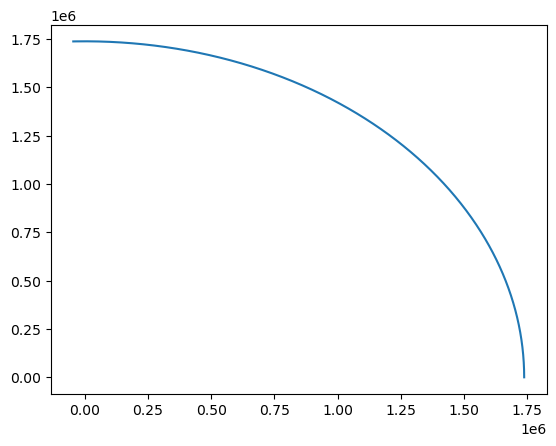

In [51]:
#Trayectoria de la luna
x_l=np.zeros(len(t))
y_l=np.zeros_like(x_l)
for i in range(len(t)):
    x_l[i]=Rl*np.cos(omega_L*t[i])
    y_l[i]=Rl*np.sin(omega_L*t[i])
plt.plot(x_l,y_l)
plt.show()

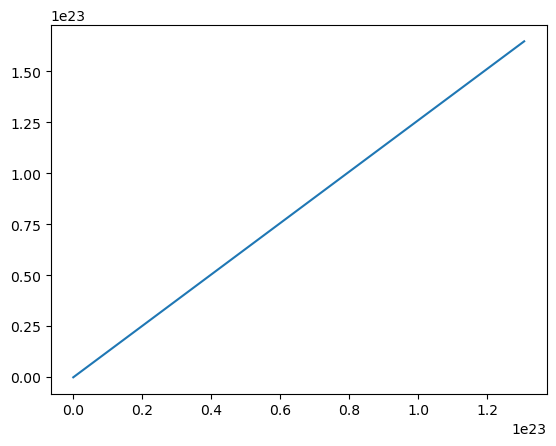

In [52]:
#Cohete
x=np.zeros(len(t))
y=np.zeros_like(x)
Runge=RUNGE_CUTIE_4_SLAY(t,h,Sistema,CI)
for i in range(len(t)):
    x[i]=Runge[0][i]*np.cos(Runge[1][i])*d
    y[i]=Runge[0][i]*np.sin(Runge[1][i])*d
plt.plot(x,y)
plt.show()

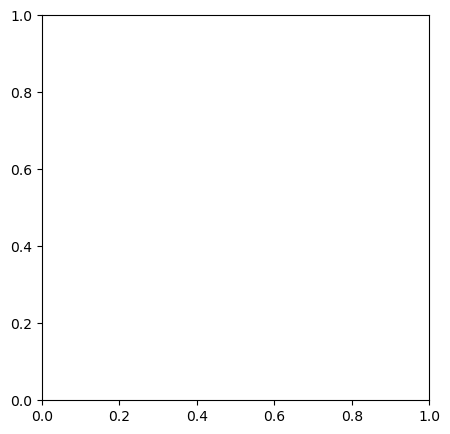

In [54]:
#Animación
scale=1000
fig5=plt.figure(figsize=(5,5))
ax5=fig5.add_subplot()
t_=t[::scale]*(1/86400)

def init():
    ax5.clear()
    ax5.set_xlim(-d,d)
    ax5.set_ylim(-d,d)

def update(i):
    init()
    x_step=x[::scale][:i]
    y_step=y[::scale][:i]
    ax5.plot(0,0,color='blue')
    ax5.plot(x_l[::scale][:i],y_l[::scale][:i],color='gray')
    ax5.plot(x[::scale][:i],y[::scale][:i],color='black')
    #plt.Circle((x_l,y_l),Rl,color='gray',fill=True)
    #plt.Circle((0,0),Rt,color='blue',fill=True)
    #plt.Circle((x,y),Rl/3,color='black',fill=True)

Animation=FuncAnimation(fig5,update,frames=len(t_),init_func=init)